<a href="https://colab.research.google.com/github/sakshik0524/Encryptix_Task3/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [27]:
!pip install pandas numpy scikit-learn seaborn matplotlib joblib


In [28]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset Loading

In [44]:
# Define the path to the dataset in Google Drive
data_path = '/content/drive/My Drive/Churn_Modelling.csv'

# Load the dataset
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
print(data.head())
print(data.sample(10))
print(data.shape)
print(data.dtypes)

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

<ipython-input-46-72c78e6a1d29>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Exited",data=data,palette=["coral","teal"])


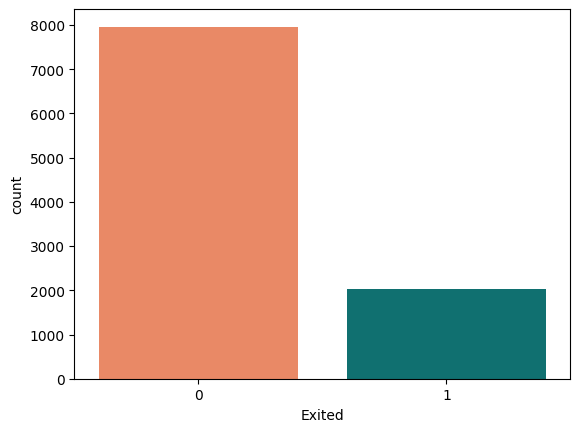

In [46]:
sns.countplot(x="Exited",data=data,palette=["coral","teal"])
plt.show()

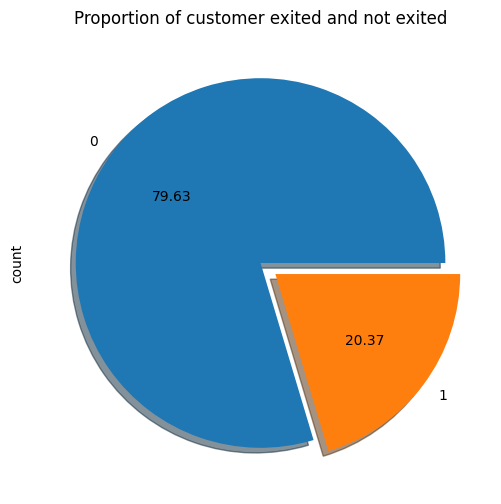

In [47]:
value_counts = pd.value_counts(data['Exited'])
plt.figure(figsize = (6,6))
value_counts.plot(kind = 'pie', explode = [0,0.1],autopct='%.2f', shadow=True)
plt.title('Proportion of customer exited and not exited')
plt.show()

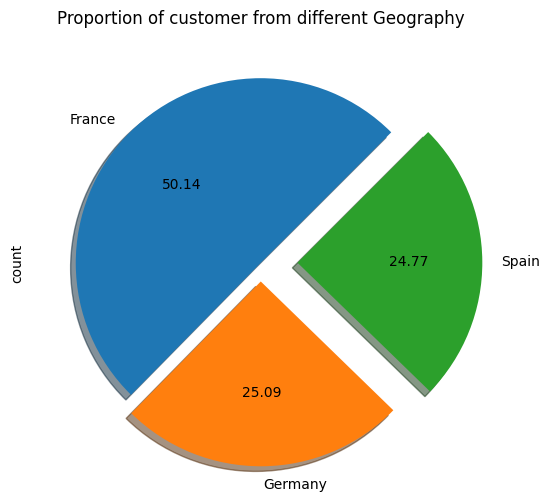

In [48]:
value_counts = pd.value_counts(data['Geography'])
plt.figure(figsize = (6,6))
value_counts.plot(kind = 'pie', explode = [0,0.1,0.2],autopct='%.2f', shadow=True,startangle=45)
plt.title('Proportion of customer from different Geography')
plt.show()

# Data Training

In [30]:
# Drop irrelevant columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Handle missing values (if any)
data = data.dropna()

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Feature and target variable separation
X = data.drop('Exited', axis=1)
y = data['Exited']


In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Verify scaling (means should be around 0 and standard deviations around 1 for standardized data)
print(np.mean(X_train, axis=0))  # Should be close to 0
print(np.std(X_train, axis=0))   # Should be close to 1


[ 5.43565193e-16 -1.89626093e-16  6.66133815e-17 -3.09974268e-16
  1.06581410e-16 -3.19744231e-17 -1.77635684e-17  1.77635684e-17
 -4.26325641e-17 -7.19424520e-17  2.84217094e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [32]:
# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')

    return accuracy, precision, recall, f1, roc_auc


# Logistic Regression, Random Forest Classifier, Gradient Boosting Classifier Algorithms

In [33]:
# Train and evaluate Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print("Logistic Regression:")
evaluate_model(log_reg, X_test, y_test)

# Train and evaluate Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
print("Random Forest Classifier:")
evaluate_model(rf_clf, X_test, y_test)

# Train and evaluate Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
print("Gradient Boosting Classifier:")
evaluate_model(gb_clf, X_test, y_test)


Logistic Regression:
Accuracy: 0.8110
Precision: 0.5524
Recall: 0.2010
F1 Score: 0.2948
ROC AUC: 0.5806
Random Forest Classifier:
Accuracy: 0.8665
Precision: 0.7625
Recall: 0.4656
F1 Score: 0.5782
ROC AUC: 0.7151
Gradient Boosting Classifier:
Accuracy: 0.8675
Precision: 0.7500
Recall: 0.4885
F1 Score: 0.5917
ROC AUC: 0.7244


(0.8675, 0.75, 0.48854961832061067, 0.5916795069337443, 0.7243619280153146)

# Confusion Matrix

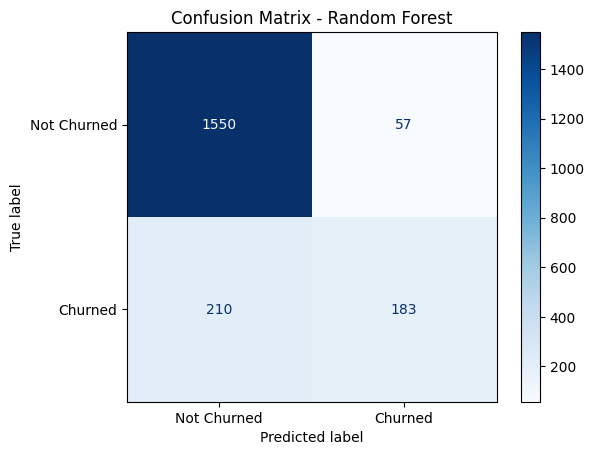

In [34]:
# Import necessary functions
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, rf_clf.predict(X_test))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churned', 'Churned'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [35]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for the best model
cv_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

Cross-validation accuracy scores: [0.8635 0.8705 0.859  0.8655 0.861 ]
Mean cross-validation accuracy: 0.8639


# Learning Curves

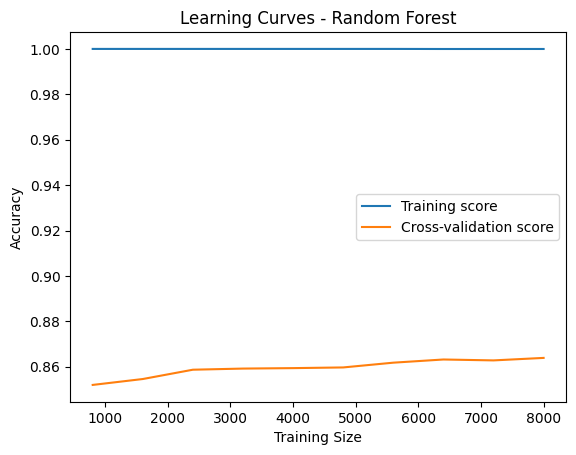

In [49]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Plot learning curves for the best model
train_sizes, train_scores, test_scores = learning_curve(rf_clf, X, y, cv=5, n_jobs=1,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves - Random Forest')
plt.legend()
plt.show()


# Dummy Classifier- Random Forest

Dummy Classifier:
Accuracy: 0.8035
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.5000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  Support beyond term:`binary` targets is achieved by treating :term:`multiclass`


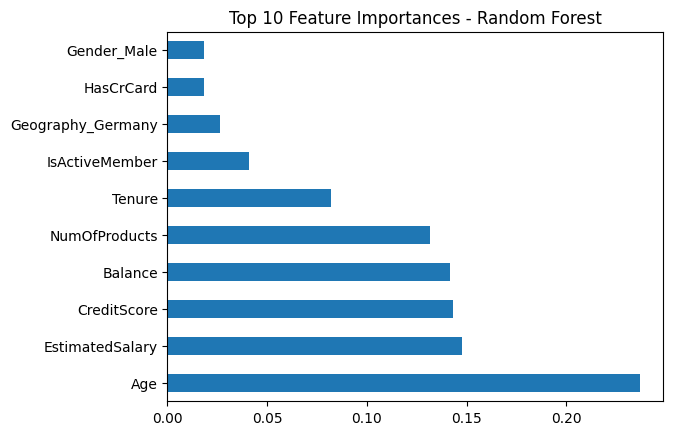

In [38]:
!pip install scikit-learn
from sklearn.dummy import DummyClassifier
# Create a dummy classifier for baseline comparison
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)

# Evaluate the dummy classifier
print("Dummy Classifier:")
evaluate_model(dummy_clf, X_test, y_test)

# Feature importance for the best model
feature_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()


In [39]:
# Save the model
joblib.dump(rf_clf, 'best_rf_clf_model.pkl')

# Load the model
loaded_model = joblib.load('best_rf_clf_model.pkl')

# Evaluate the loaded model
print("Loaded Model Evaluation:")
evaluate_model(loaded_model, X_test, y_test)


Loaded Model Evaluation:
Accuracy: 0.8665
Precision: 0.7625
Recall: 0.4656
F1 Score: 0.5782
ROC AUC: 0.7151


(0.8665, 0.7625, 0.46564885496183206, 0.5781990521327014, 0.7150895177111586)